In [30]:
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from sklearn.metrics import precision_score, recall_score, classification_report, f1_score, confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

In [2]:
folder_paths_normal = ["C:/Users/Parth/Downloads/chest_xray/train/NORMAL", "C:/Users/Parth/Downloads/chest_xray/test/NORMAL"]

In [3]:
data = []

for path in folder_paths_normal:
    files = os.listdir(path)
    for file in files:
        image_path = os.path.join(path, file)
        image = Image.open(image_path).resize((224, 224))
        image_array = np.array(image)
        data.append({
            'filename': file,
            'image_array': image_array,
            'label': "Normal"
        })

In [4]:
folder_paths_pneumonia = ['C:/Users/Parth/Downloads/chest_xray/train/PNEUMONIA', 'C:/Users/Parth/Downloads/chest_xray/test/PNEUMONIA']

In [5]:
for path in folder_paths_pneumonia:
    files = os.listdir(path)
    for file in files:
        image_path = os.path.join(path, file)
        image = Image.open(image_path).resize((224, 224))
        image_array = np.array(image)
        data.append({
            'filename': file,
            'image_array': image_array,
            'label': "Pneumonia"
        })

In [6]:
df = pd.DataFrame(data)

In [13]:
df.head()

,filename,image_array,label
0,NORMAL-1003233-0001.jpeg,"[[93, 97, 97, 93, 90, 98, 100, 97, 148, 175, 1...",Normal
1,NORMAL-1012843-0001.jpeg,"[[145, 147, 146, 152, 161, 180, 196, 196, 182,...",Normal
2,NORMAL-1014768-0001.jpeg,"[[68, 65, 71, 69, 60, 82, 119, 112, 103, 112, ...",Normal
3,NORMAL-1023731-0001.jpeg,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Normal
4,NORMAL-1029510-0001.jpeg,"[[25, 2, 0, 0, 0, 0, 3, 8, 15, 20, 26, 31, 41,...",Normal


In [15]:
df['image_array'][0].shape

(224, 224)

In [7]:
df['class'] = df['label'].apply(lambda x: 1 if x == 'Pneumonia' else 0)

In [19]:
df.tail()

,filename,image_array,label,class
5851,VIRUS-9584831-0001.jpeg,"[[25, 32, 39, 42, 106, 215, 77, 82, 201, 155, ...",Pneumonia,1
5852,VIRUS-9671740-0001.jpeg,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Pneumonia,1
5853,VIRUS-9783315-0001.jpeg,"[[21, 25, 29, 32, 35, 36, 38, 40, 45, 50, 53, ...",Pneumonia,1
5854,VIRUS-9890836-0001.jpeg,"[[0, 0, 0, 0, 0, 152, 167, 0, 0, 157, 172, 0, ...",Pneumonia,1
5855,VIRUS-9968655-0001.jpeg,"[[8, 8, 9, 10, 10, 16, 226, 121, 6, 7, 125, 23...",Pneumonia,1


In [111]:
df['image_array'] = df['image_array']/255.0

In [125]:
df['image_array']

0       [[0.36470588235294116, 0.3803921568627451, 0.3...
1       [[0.5686274509803921, 0.5764705882352941, 0.57...
2       [[0.26666666666666666, 0.2549019607843137, 0.2...
3       [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
4       [[0.09803921568627451, 0.00784313725490196, 0....
                              ...                        
5851    [[0.09803921568627451, 0.12549019607843137, 0....
5852    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
5853    [[0.08235294117647059, 0.09803921568627451, 0....
5854    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.596078431372549, ...
5855    [[0.03137254901960784, 0.03137254901960784, 0....
Name: image_array, Length: 5856, dtype: object

In [113]:
df['image_array'][0].shape

(224, 224)

In [10]:
def convert_to_rgb(array):
    return np.stack([array] * 3, axis = -1)

In [11]:
df['image_array'] = df['image_array'].apply(lambda x: convert_to_rgb(x) if x.shape != (224, 224, 3) else x)

In [133]:
for i in range(len(df)):
    if(df['image_array'][i].shape != (224, 224, 3)):
        print(i)

In [230]:
df['image_array'] *= 255.0

In [26]:
df.tail()

,filename,image_array,label,class
5851,VIRUS-9584831-0001.jpeg,"[[[25, 25, 25], [32, 32, 32], [39, 39, 39], [4...",Pneumonia,1
5852,VIRUS-9671740-0001.jpeg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Pneumonia,1
5853,VIRUS-9783315-0001.jpeg,"[[[21, 21, 21], [25, 25, 25], [29, 29, 29], [3...",Pneumonia,1
5854,VIRUS-9890836-0001.jpeg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Pneumonia,1
5855,VIRUS-9968655-0001.jpeg,"[[[8, 8, 8], [8, 8, 8], [9, 9, 9], [10, 10, 10...",Pneumonia,1


In [12]:
df['image_array'] = df['image_array'].apply(lambda x: x.astype(int))

In [29]:
df.tail()

,filename,image_array,label,class
5851,VIRUS-9584831-0001.jpeg,"[[[25, 25, 25], [32, 32, 32], [39, 39, 39], [4...",Pneumonia,1
5852,VIRUS-9671740-0001.jpeg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Pneumonia,1
5853,VIRUS-9783315-0001.jpeg,"[[[21, 21, 21], [25, 25, 25], [29, 29, 29], [3...",Pneumonia,1
5854,VIRUS-9890836-0001.jpeg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Pneumonia,1
5855,VIRUS-9968655-0001.jpeg,"[[[8, 8, 8], [8, 8, 8], [9, 9, 9], [10, 10, 10...",Pneumonia,1


In [13]:
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7

In [61]:
b0 = EfficientNetB0(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))

In [63]:
x = b0.output

In [65]:
x.shape

(None, 7, 7, 1280)

In [325]:
for i in range(len(df)):
    if(df['image_array'][i].shape != (224, 224, 3)):
        print(i)
df.tail()

,filename,image_array,label,class
5851,VIRUS-9584831-0001.jpeg,"[[[25, 25, 25], [32, 32, 32], [39, 39, 39], [4...",Pneumonia,1
5852,VIRUS-9671740-0001.jpeg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Pneumonia,1
5853,VIRUS-9783315-0001.jpeg,"[[[21, 21, 21], [25, 25, 25], [29, 29, 29], [3...",Pneumonia,1
5854,VIRUS-9890836-0001.jpeg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Pneumonia,1
5855,VIRUS-9968655-0001.jpeg,"[[[8, 8, 8], [8, 8, 8], [9, 9, 9], [10, 10, 10...",Pneumonia,1


In [14]:
X = np.array(df['image_array'].tolist())
y = df['class'].to_numpy()

In [32]:
print(X.shape)
print(y.shape)

(5856, 224, 224, 3)
(5856,)


In [15]:
X_train, temp_data, y_train, temp_labels = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(temp_data, temp_labels, test_size = 0.33, random_state = 42)

([<matplotlib.patches.Wedge at 0x21ac544b890>,
 [Text(-0.6758531762240818, 0.9304420907223729, 'train'),
  Text(0.34294787662237153, -1.0451730736678049, 'validation'),
  Text(1.0471786282256945, -0.3367742873013807, 'test')],
 [Text(-0.38200396917013313, 0.5259020512778629, '70.0%'),
  Text(0.1870624781576572, -0.5700944038188026, '20.1%'),
  Text(0.5711883426685606, -0.1836950658007531, '9.9%')])

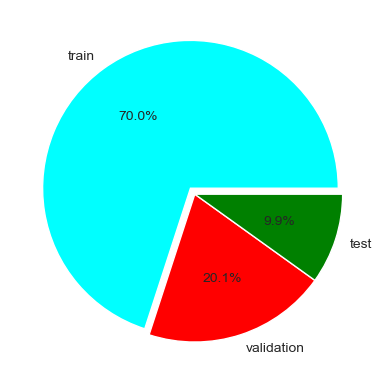

In [34]:
plt.pie([len(X_train), len(X_val), len(X_test)],
        labels=['train', 'validation', 'test'], autopct='%.1f%%', colors=['aqua', 'red', 'green'], explode=(0.05, 0, 0))

In [75]:
b0.trainable = False

In [77]:
x = Conv2D(64, kernel_size = (5,5), padding = 'same', activation = 'relu', input_shape = (224, 224, 3))(x)
#print(x.shape)
x = MaxPooling2D(pool_size = (2,2), padding = 'same')(x)

x = Conv2D(128, kernel_size = (5,5), padding = 'same', activation = 'relu')(x)
x = MaxPooling2D(pool_size = (2,2), padding = 'same')(x)

x = Conv2D(128, kernel_size = (5,5), padding = 'same', activation = 'relu')(x)
x = MaxPooling2D(pool_size = (2,2), padding = 'same')(x)

x = Flatten()(x)

x = Dense(128, activation = 'relu')(x)
x = Dropout(0.3)(x)

x = Dense(128, activation = 'relu')(x)
x = Dropout(0.3)(x)

output = Dense(1, activation = 'sigmoid')(x)

C:\Users\Parth\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [79]:
b0_base_model = Model(inputs = b0.input, outputs = output)

In [173]:
print(b0_base_model)

<Functional name=functional_1, built=True>


In [81]:
b0_base_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_2 (Rescaling)       │ (None, 224, 224, 3)       │               0 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization_1               │ (None, 224, 224, 3)       │               7 │ rescaling_2[0][0]          │
│ (Normalization)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_3 (Rescaling)       │ (None, 224, 224, 3)       │               0 │ normalization_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv_pad (ZeroPadding2D) │ (None, 225, 225, 3)       │               0 │ rescaling_3[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv (Conv2D)            │ (None, 112, 112, 32)      │             864 │ stem_conv_pad[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_bn (BatchNormalization)  │ (None, 112, 112, 32)      │             128 │ stem_conv[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_activation (Activation)  │ (None, 112, 112, 32)      │               0 │ stem_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_dwconv                │ (None, 112, 112, 32)      │             288 │ stem_activation[0][0]      │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_bn                    │ (None, 112, 112, 32)      │             128 │ block1a_dwconv[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_activation            │ (None, 112, 112, 32)      │               0 │ block1a_bn[0][0]           │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_squeeze            │ (None, 32)                │               0 │ block1a_activation[0][0]   │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reshape (Reshape)  │ (None, 1, 1, 32)          │               0 │ block1a_se_squeeze[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reduce (Conv2D)    │ (None, 1, 1, 8)           │             264 │ block1a_se_reshape[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_expand (Conv2D)    │ (None, 1, 1, 32)          │             28

 Total params: 6,745,444 (25.73 MB)

 Trainable params: 2,695,873 (10.28 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [83]:
epochs = 10
optimizer = Adam(learning_rate = 0.001)
b0_base_model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['Accuracy'])

In [85]:
history = b0_base_model.fit(x = X_train, y = y_train, epochs = epochs, validation_data = (X_val, y_val), shuffle = True)

Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 100s 675ms/step - Accuracy: 0.8697 - loss: 0.2889 - val_Accuracy: 0.9643 - val_loss: 0.0841
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 93s 718ms/step - Accuracy: 0.9642 - loss: 0.1040 - val_Accuracy: 0.9728 - val_loss: 0.0738
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 92s 716ms/step - Accuracy: 0.9666 - loss: 0.0932 - val_Accuracy: 0.9618 - val_loss: 0.0975
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 91s 705ms/step - Accuracy: 0.9718 - loss: 0.0739 - val_Accuracy: 0.9822 - val_loss: 0.0726
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 87s 673ms/step - Accuracy: 0.9766 - loss: 0.0782 - val_Accuracy: 0.9805 - val_loss: 0.0932
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 87s 675ms/step - Accuracy: 0.9820 - loss: 0.0587 - val_Accuracy: 0.9567 - val_loss: 0.1589
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 85s 662ms/step - Accuracy: 0.9768 - loss: 0.0631 - val_Accuracy: 0.9728 - val_loss: 0.0909
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 85s 656ms/step - Accuracy: 0.9790 - loss: 

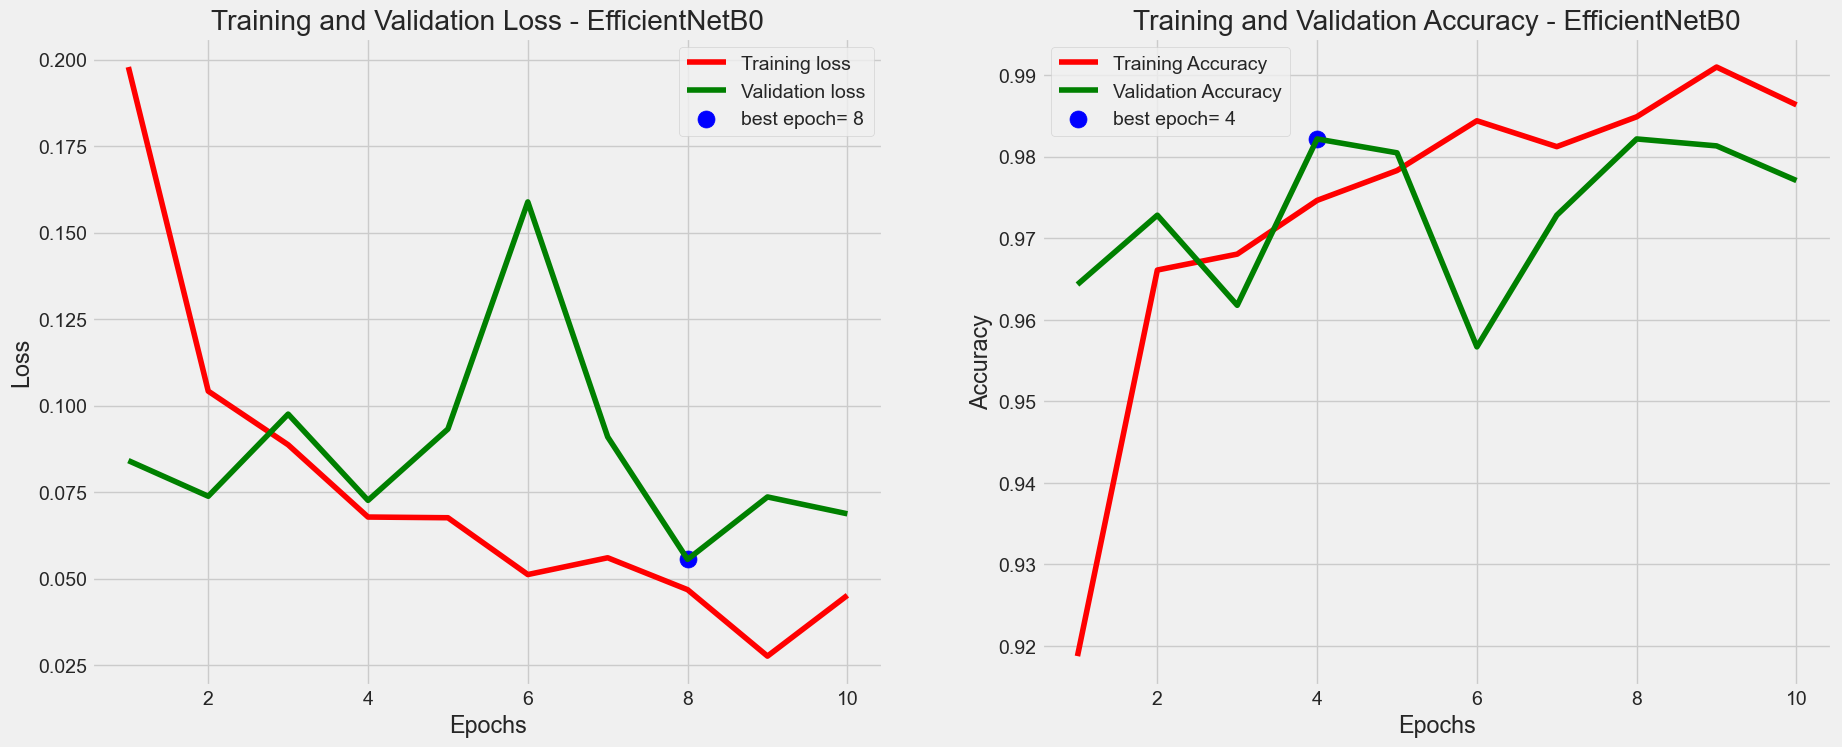

In [171]:
import matplotlib.pyplot as plt

tr_acc = history.history['Accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_Accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title(f"Training and Validation Loss - {model_name}")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
model_name = "EfficientNetB0"
plt.title(f"Training and Validation Accuracy - {model_name}")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [129]:
loss, accuracy = b0_base_model.evaluate(x = X_val, y = y_val)

print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 476ms/step - Accuracy: 0.9814 - loss: 0.0711
Validation Loss: 0.06872528046369553
Validation Accuracy: 0.9770603179931641


In [97]:
preds = b0_base_model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 559ms/step


In [105]:
for i in range(len(preds)):
    if(preds[i] >= 0.5):
        preds[i] = 1
    else:
        preds[i] = 0



NameError: name 'precision_score' is not defined

In [9]:
from sklearn.metrics import precision_score, recall_score, classification_report, f1_score


confusion_matrix = confusion_matrix(preds, y_test)
precision = precision_score(preds, y_test)
recall = recall_score(preds, y_test)
f1_score = f1_score(preds, y_test)
classification_report = classification_report(preds, y_test)

print(confusion_matrix)
print('Precision:', str(precision))
print('Recall:', str(recall))
print('F1_Score:', str(f1_score))
print(classification_report)

NameError: name 'confusion_matrix' is not defined

In [119]:
from tensorflow.keras.models import Model

b0_base_model.save(filepath = "EfficientNet_b0_base_model.keras")

In [18]:
def plot_metrics(model, history, version):
    
    tr_acc = history.history['Accuracy']
    tr_loss = history.history['loss']
    val_acc = history.history['val_Accuracy']
    val_loss = history.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'
    
    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')
    
    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title(f"Training and Validation Loss - EfficientNetB{version + 1}")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title(f"Training and Validation Accuracy - EfficientNetB{version + 1}")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout
    plt.show()

In [19]:
def validate(model, X_val, y_val, version):
    loss, accuracy = model.evaluate(x = X_val, y = y_val)
    print(f"Base Model: EfficientNetB{version + 1}")
    print("\n")
    print(f"Validation Loss: {loss}")
    print(f"Validation Accuracy: {accuracy}")
    print("\n")

In [20]:
def metrics(y_test, preds):
    for i in range(len(preds)):
        if(preds[i] >= 0.5):
            preds[i] = 1
        else:
            preds[i] = 0
 #   print(preds)
    matrix = confusion_matrix(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    report = classification_report(y_test, preds)
    
    print(matrix)
    print("\n")
    print('Precision:', str(precision))
    print('Recall:', str(recall))
    print('F1_Score:', str(f1))
    print("\n")
    print(report)
    print("\n")
    print("\n")

In [55]:
def train(base, version):
    base_model = base
    x = base_model.output
    base_model.trainable = False
    x = Conv2D(64, kernel_size = (5,5), padding = 'same', activation = 'relu', input_shape = (224, 224, 3))(x)
    x = MaxPooling2D(pool_size = (2,2), padding = 'same')(x)
    
    x = Conv2D(128, kernel_size = (5,5), padding = 'same', activation = 'relu')(x)
    x = MaxPooling2D(pool_size = (2,2), padding = 'same')(x)
    
    x = Conv2D(128, kernel_size = (5,5), padding = 'same', activation = 'relu')(x)
    x = MaxPooling2D(pool_size = (2,2), padding = 'same')(x)
    
    x = Flatten()(x)
    
    x = Dense(128, activation = 'relu')(x)
    x = Dropout(0.3)(x)
    
    x = Dense(128, activation = 'relu')(x)
    x = Dropout(0.3)(x)
    
    output = Dense(1, activation = 'sigmoid')(x)
    
    b_base_model_added_layers = Model(inputs = base_model.input, outputs = output)

    epochs = 10
    optimizer = Adam(learning_rate = 0.001)
    b_base_model_added_layers.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['Accuracy'])
    
    print(f"Base Model: EfficientNetB{version + 1}")
    print("\n")
    
    history = b_base_model_added_layers.fit(x = X_train, y = y_train, epochs = epochs, validation_data = (X_val, y_val), shuffle = True)
    print("\n")
    plot_metrics(b_base_model_added_layers, history, version)
    validate(b_base_model_added_layers, X_val, y_val, version)

    preds = b_base_model_added_layers.predict(X_test)
    metrics(preds, y_test)

    b_base_model_added_layers.save(filepath = f"EfficientNet_B{version + 1}_base_model.keras")

In [21]:
bases = [EfficientNetB1(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3)),
 EfficientNetB2(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3)),
 EfficientNetB3(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3)),
 EfficientNetB4(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3)),
 EfficientNetB5(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3)),
 EfficientNetB6(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3)),
 EfficientNetB7(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))
]

C:\Users\Parth\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Base Model: EfficientNetB1


Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 140s 996ms/step - Accuracy: 0.8773 - loss: 0.2978 - val_Accuracy: 0.9439 - val_loss: 0.1728
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 128s 994ms/step - Accuracy: 0.9558 - loss: 0.1154 - val_Accuracy: 0.9635 - val_loss: 0.0983
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 127s 985ms/step - Accuracy: 0.9742 - loss: 0.0764 - val_Accuracy: 0.9524 - val_loss: 0.1055
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 127s 984ms/step - Accuracy: 0.9703 - loss: 0.0749 - val_Accuracy: 0.9779 - val_loss: 0.0670
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 126s 979ms/step - Accuracy: 0.9855 - loss: 0.0527 - val_Accuracy: 0.9652 - val_loss: 0.0835
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 125s 972ms/step - Accuracy: 0.9807 - loss: 0.0429 - val_Accuracy: 0.9762 - val_loss: 0.1004
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 125s 968ms/step - Accuracy: 0.9906 - loss: 0.0291 - val_Accuracy: 0.9703 - val_loss: 0.1137
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 124s 96

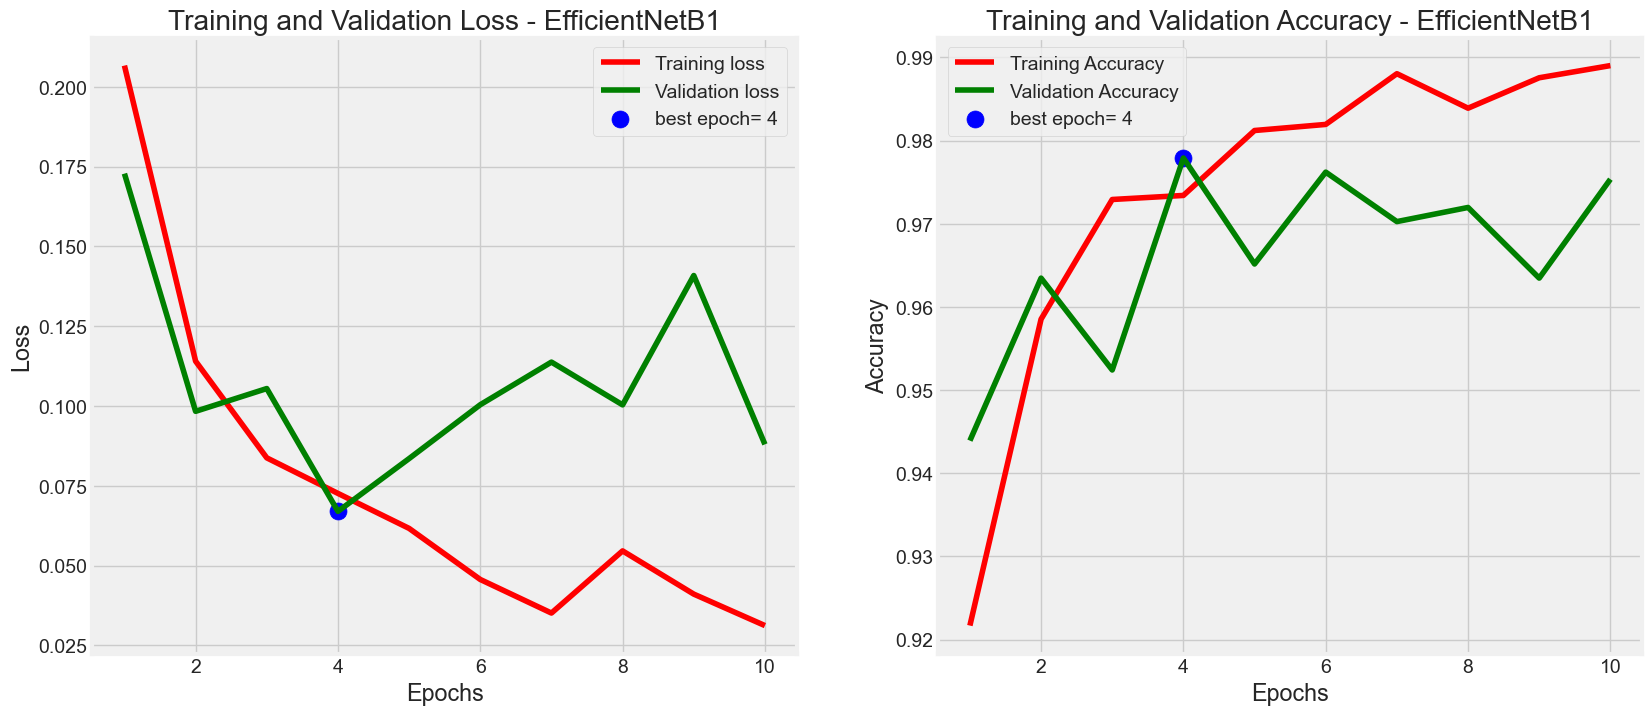

37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 709ms/step - Accuracy: 0.9756 - loss: 0.0894
Base Model: EfficientNetB1


Validation Loss: 0.087965227663517
Validation Accuracy: 0.9753611087799072


19/19 ━━━━━━━━━━━━━━━━━━━━ 18s 816ms/step
[[153   9]
 [  2 416]]


Precision: 0.9788235294117648
Recall: 0.9952153110047847
F1_Score: <function f1_score at 0x0000021ABAF13240>


              precision    recall  f1-score   support

         0.0       0.99      0.94      0.97       162
         1.0       0.98      1.00      0.99       418

    accuracy                           0.98       580
   macro avg       0.98      0.97      0.98       580
weighted avg       0.98      0.98      0.98       580







C:\Users\Parth\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Base Model: EfficientNetB2


Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - Accuracy: 0.8270 - loss: 0.3422 - val_Accuracy: 0.9609 - val_loss: 0.1119
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - Accuracy: 0.9608 - loss: 0.1012 - val_Accuracy: 0.9694 - val_loss: 0.0820
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - Accuracy: 0.9706 - loss: 0.0814 - val_Accuracy: 0.9550 - val_loss: 0.1728
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - Accuracy: 0.9718 - loss: 0.0744 - val_Accuracy: 0.9737 - val_loss: 0.0707
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - Accuracy: 0.9764 - loss: 0.0695 - val_Accuracy: 0.9754 - val_loss: 0.0730
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - Accuracy: 0.9756 - loss: 0.0746 - val_Accuracy: 0.9788 - val_loss: 0.0682
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - Accuracy: 0.9857 - loss: 0.0349 - val_Accuracy: 0.9745 - val_loss: 0.0827
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - Accuracy: 0.9

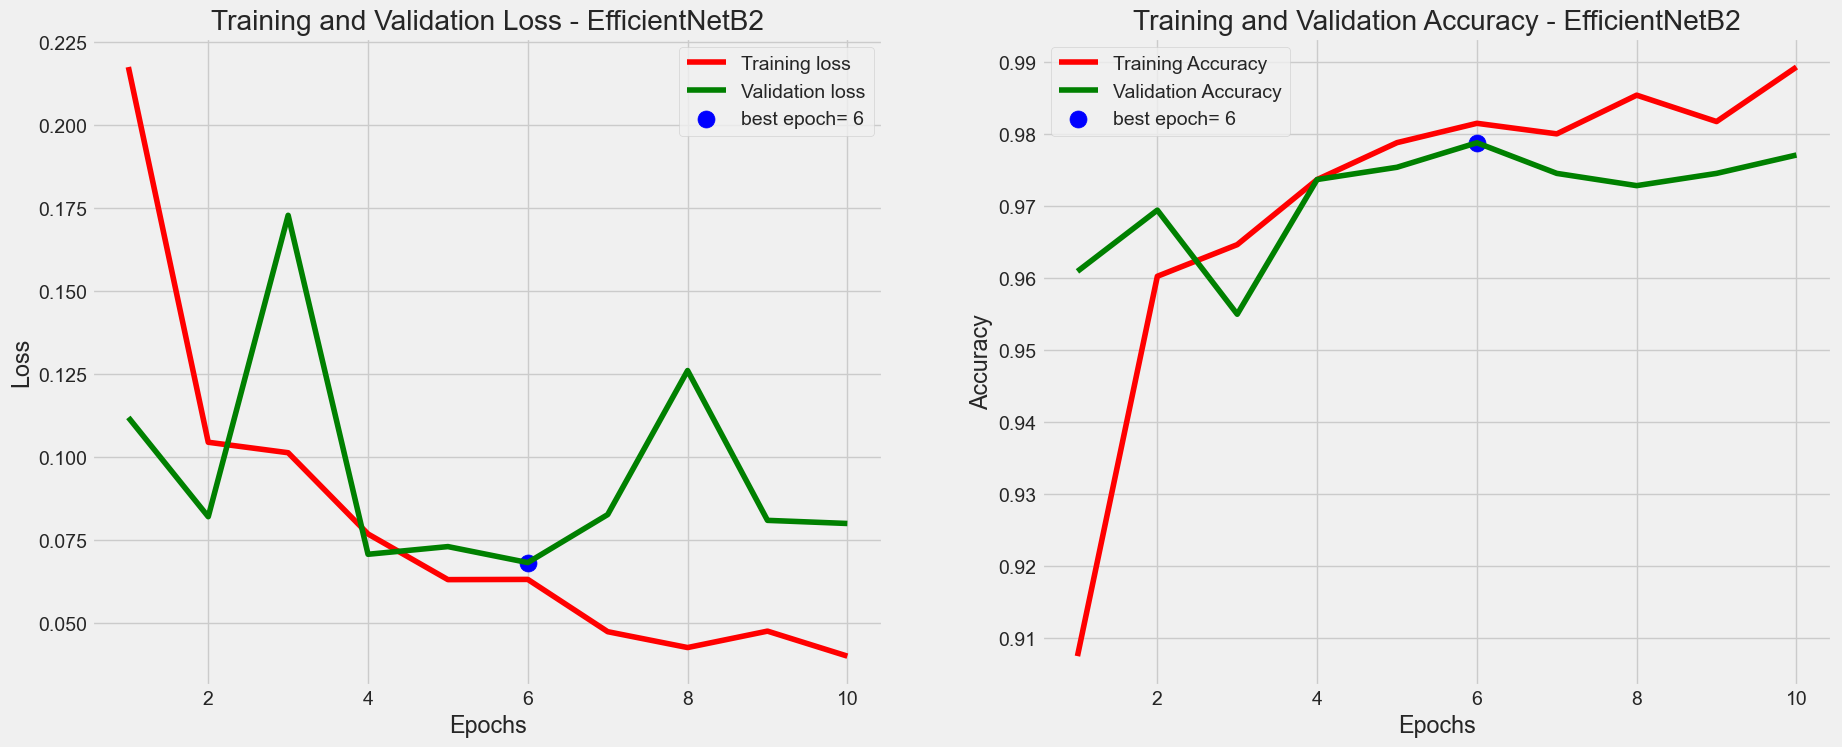

37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 757ms/step - Accuracy: 0.9752 - loss: 0.0821
Base Model: EfficientNetB2


Validation Loss: 0.07998654246330261
Validation Accuracy: 0.9770603179931641


19/19 ━━━━━━━━━━━━━━━━━━━━ 18s 851ms/step
[[149   4]
 [  6 421]]


Precision: 0.9905882352941177
Recall: 0.9859484777517564
F1_Score: <function f1_score at 0x0000021ABAF13240>


              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       153
         1.0       0.99      0.99      0.99       427

    accuracy                           0.98       580
   macro avg       0.98      0.98      0.98       580
weighted avg       0.98      0.98      0.98       580







C:\Users\Parth\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Base Model: EfficientNetB3


Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 193s 1s/step - Accuracy: 0.8613 - loss: 0.3087 - val_Accuracy: 0.9660 - val_loss: 0.1012
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - Accuracy: 0.9510 - loss: 0.1302 - val_Accuracy: 0.9686 - val_loss: 0.0877
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - Accuracy: 0.9684 - loss: 0.0912 - val_Accuracy: 0.9601 - val_loss: 0.1032
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - Accuracy: 0.9703 - loss: 0.0783 - val_Accuracy: 0.9728 - val_loss: 0.0773
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - Accuracy: 0.9774 - loss: 0.0665 - val_Accuracy: 0.9660 - val_loss: 0.0939
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - Accuracy: 0.9710 - loss: 0.0674 - val_Accuracy: 0.9711 - val_loss: 0.0773
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 176s 1s/step - Accuracy: 0.9850 - loss: 0.0451 - val_Accuracy: 0.9686 - val_loss: 0.0967
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - Accuracy: 0.9

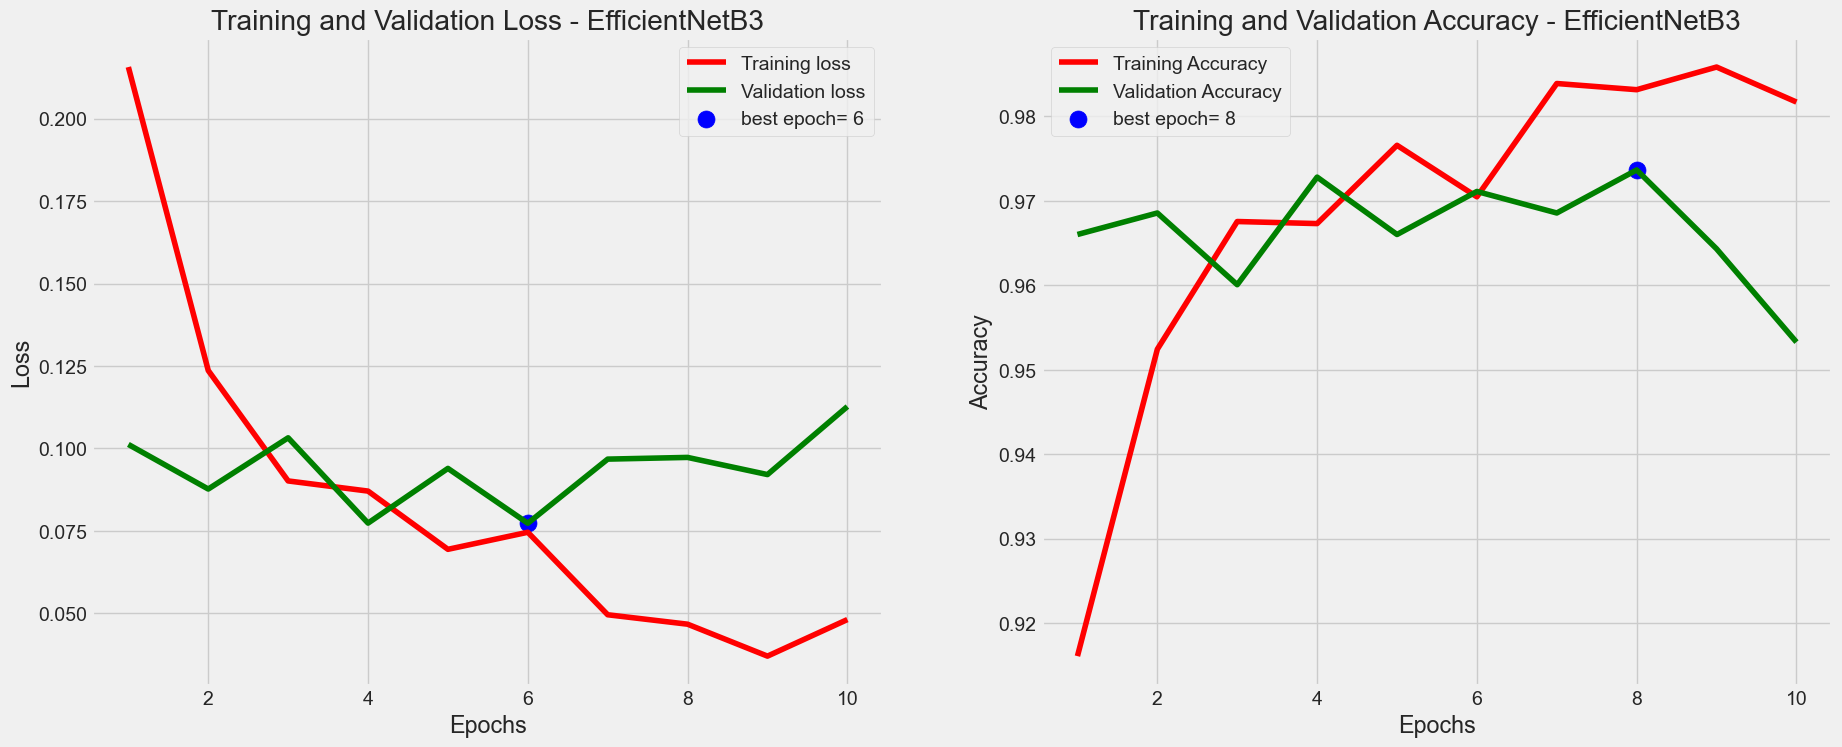

37/37 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - Accuracy: 0.9497 - loss: 0.1144
Base Model: EfficientNetB3


Validation Loss: 0.112690269947052
Validation Accuracy: 0.9532710313796997


19/19 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step
[[134   1]
 [ 21 424]]


Precision: 0.9976470588235294
Recall: 0.952808988764045
F1_Score: <function f1_score at 0x0000021ABAF13240>


              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       135
         1.0       1.00      0.95      0.97       445

    accuracy                           0.96       580
   macro avg       0.93      0.97      0.95       580
weighted avg       0.97      0.96      0.96       580







C:\Users\Parth\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Base Model: EfficientNetB4


Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 253s 2s/step - Accuracy: 0.8480 - loss: 0.3334 - val_Accuracy: 0.9550 - val_loss: 0.1358
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - Accuracy: 0.9589 - loss: 0.1068 - val_Accuracy: 0.9677 - val_loss: 0.0918
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - Accuracy: 0.9715 - loss: 0.0945 - val_Accuracy: 0.9626 - val_loss: 0.0968
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - Accuracy: 0.9733 - loss: 0.0791 - val_Accuracy: 0.9601 - val_loss: 0.1112
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - Accuracy: 0.9718 - loss: 0.0809 - val_Accuracy: 0.9796 - val_loss: 0.0690
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - Accuracy: 0.9746 - loss: 0.0749 - val_Accuracy: 0.9737 - val_loss: 0.0777
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - Accuracy: 0.9813 - loss: 0.0618 - val_Accuracy: 0.9762 - val_loss: 0.0748
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - Accuracy: 0.9

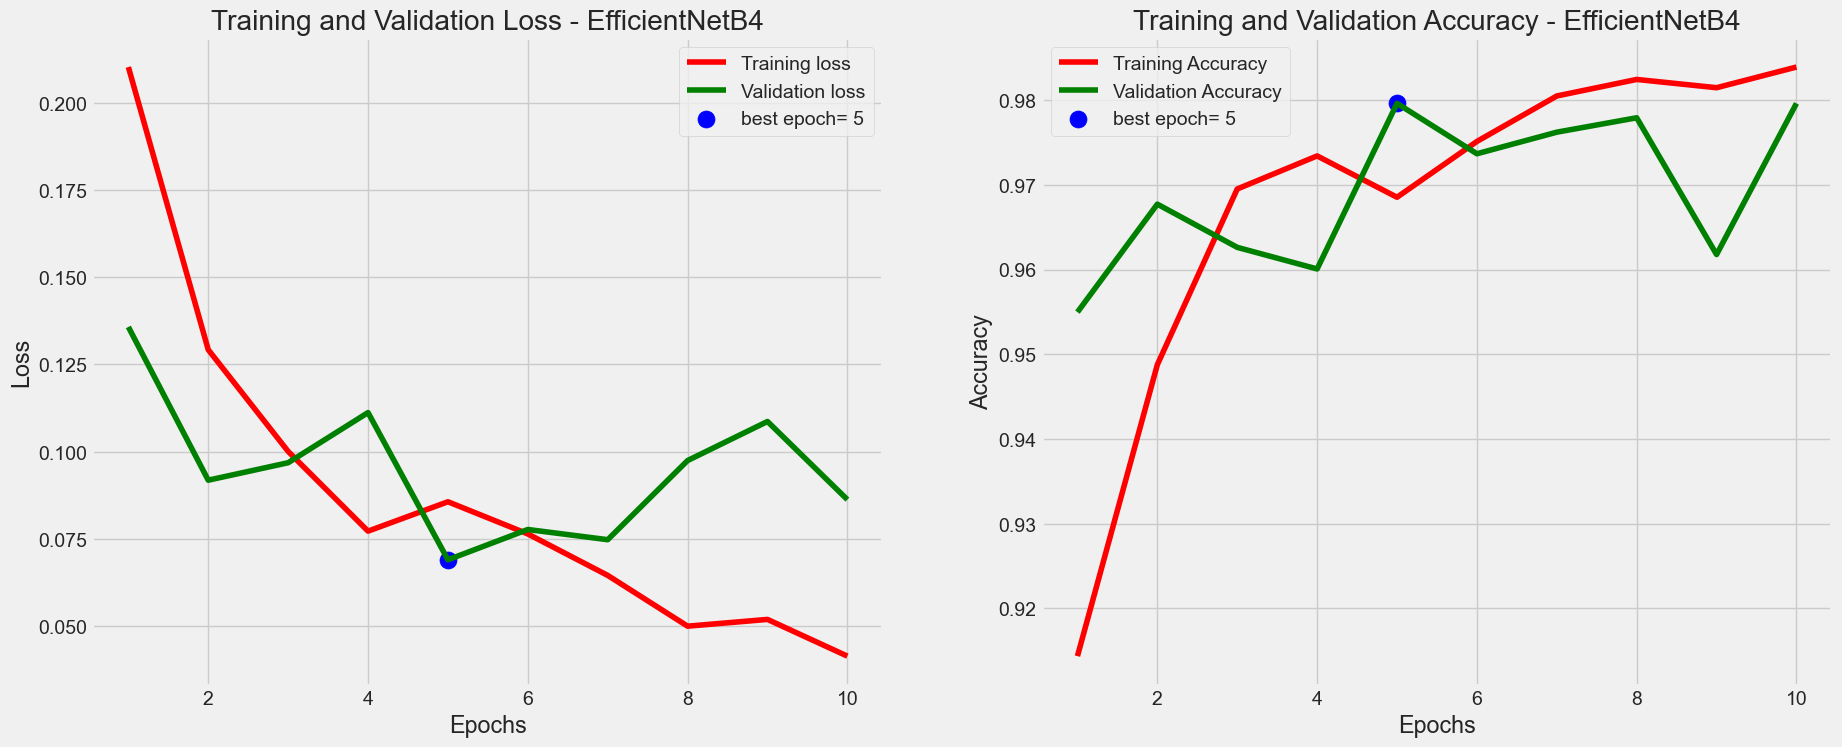

37/37 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - Accuracy: 0.9830 - loss: 0.0842
Base Model: EfficientNetB4


Validation Loss: 0.08627598732709885
Validation Accuracy: 0.9796091914176941


19/19 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step
[[148   7]
 [  7 418]]


Precision: 0.9835294117647059
Recall: 0.9835294117647059
F1_Score: <function f1_score at 0x0000021ABAF13240>


              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       155
         1.0       0.98      0.98      0.98       425

    accuracy                           0.98       580
   macro avg       0.97      0.97      0.97       580
weighted avg       0.98      0.98      0.98       580







C:\Users\Parth\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Base Model: EfficientNetB5


Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 350s 3s/step - Accuracy: 0.8451 - loss: 0.3266 - val_Accuracy: 0.9584 - val_loss: 0.1161
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 325s 3s/step - Accuracy: 0.9540 - loss: 0.1185 - val_Accuracy: 0.9295 - val_loss: 0.2228
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 325s 3s/step - Accuracy: 0.9581 - loss: 0.1288 - val_Accuracy: 0.9618 - val_loss: 0.0981
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 324s 3s/step - Accuracy: 0.9648 - loss: 0.0915 - val_Accuracy: 0.9507 - val_loss: 0.1195
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 324s 3s/step - Accuracy: 0.9706 - loss: 0.0906 - val_Accuracy: 0.9601 - val_loss: 0.1497
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 324s 3s/step - Accuracy: 0.9795 - loss: 0.0675 - val_Accuracy: 0.9728 - val_loss: 0.0945
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 326s 3s/step - Accuracy: 0.9787 - loss: 0.0573 - val_Accuracy: 0.9728 - val_loss: 0.0774
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 326s 3s/step - Accuracy: 0.9

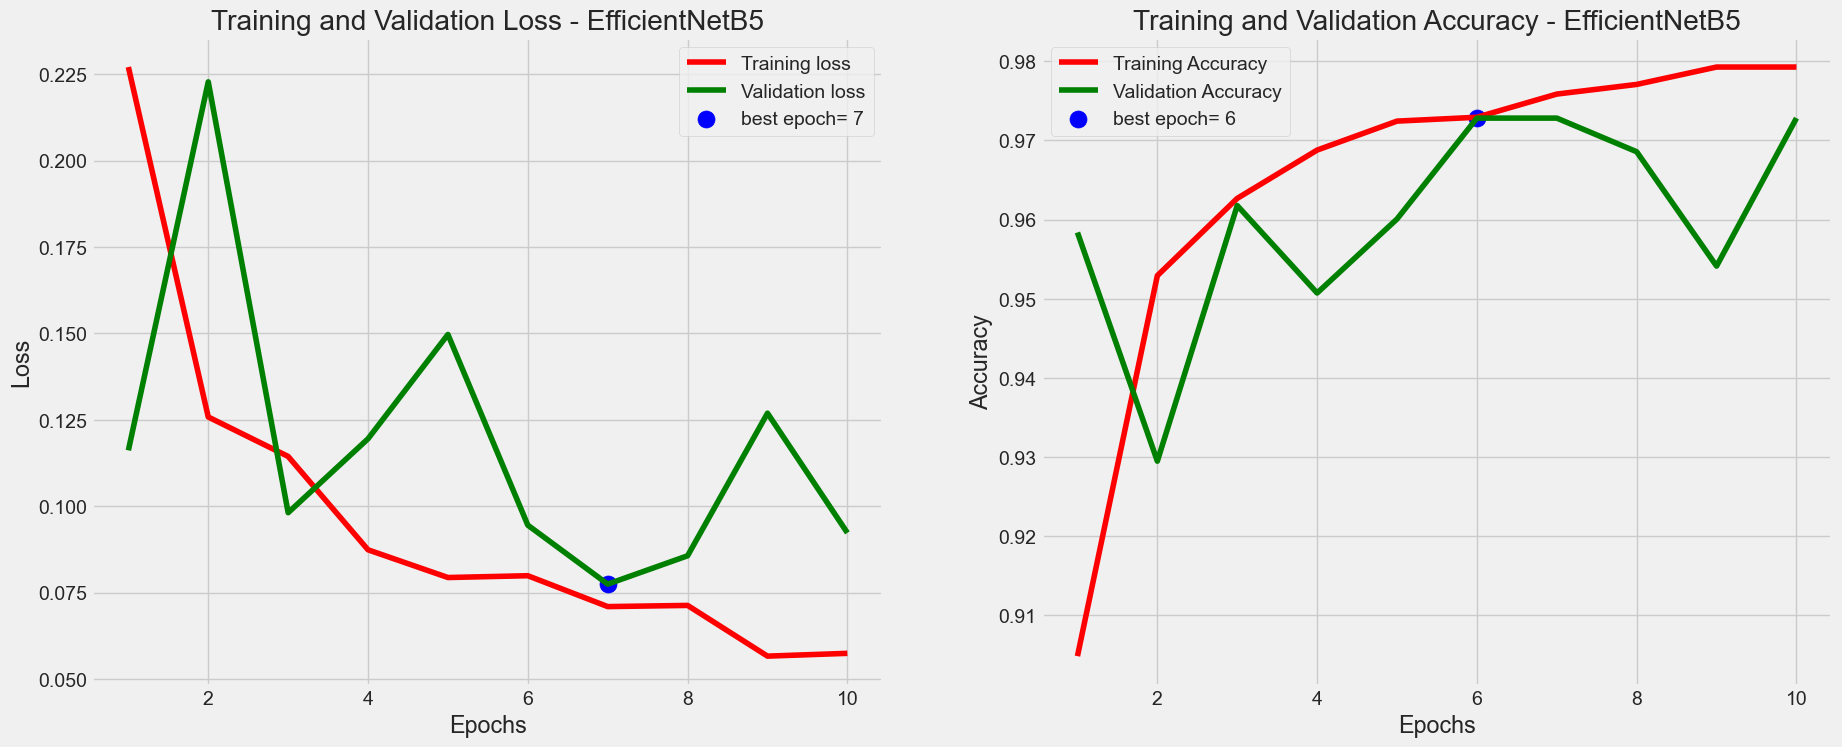

37/37 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - Accuracy: 0.9746 - loss: 0.0895
Base Model: EfficientNetB5


Validation Loss: 0.0922672227025032
Validation Accuracy: 0.9728122353553772


19/19 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step
[[149   5]
 [  6 420]]


Precision: 0.9882352941176471
Recall: 0.9859154929577465
F1_Score: <function f1_score at 0x0000021ABAF13240>


              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       154
         1.0       0.99      0.99      0.99       426

    accuracy                           0.98       580
   macro avg       0.97      0.98      0.98       580
weighted avg       0.98      0.98      0.98       580







C:\Users\Parth\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Base Model: EfficientNetB6


Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 451s 3s/step - Accuracy: 0.8403 - loss: 0.3564 - val_Accuracy: 0.9388 - val_loss: 0.1449
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 421s 3s/step - Accuracy: 0.9495 - loss: 0.1426 - val_Accuracy: 0.9473 - val_loss: 0.1347
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 421s 3s/step - Accuracy: 0.9601 - loss: 0.1087 - val_Accuracy: 0.9558 - val_loss: 0.1131
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 422s 3s/step - Accuracy: 0.9607 - loss: 0.1035 - val_Accuracy: 0.9635 - val_loss: 0.0957
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 420s 3s/step - Accuracy: 0.9671 - loss: 0.0873 - val_Accuracy: 0.9601 - val_loss: 0.1485
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 421s 3s/step - Accuracy: 0.9742 - loss: 0.0809 - val_Accuracy: 0.9686 - val_loss: 0.0919
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 422s 3s/step - Accuracy: 0.9812 - loss: 0.0693 - val_Accuracy: 0.9652 - val_loss: 0.0867
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 422s 3s/step - Accuracy: 0.9

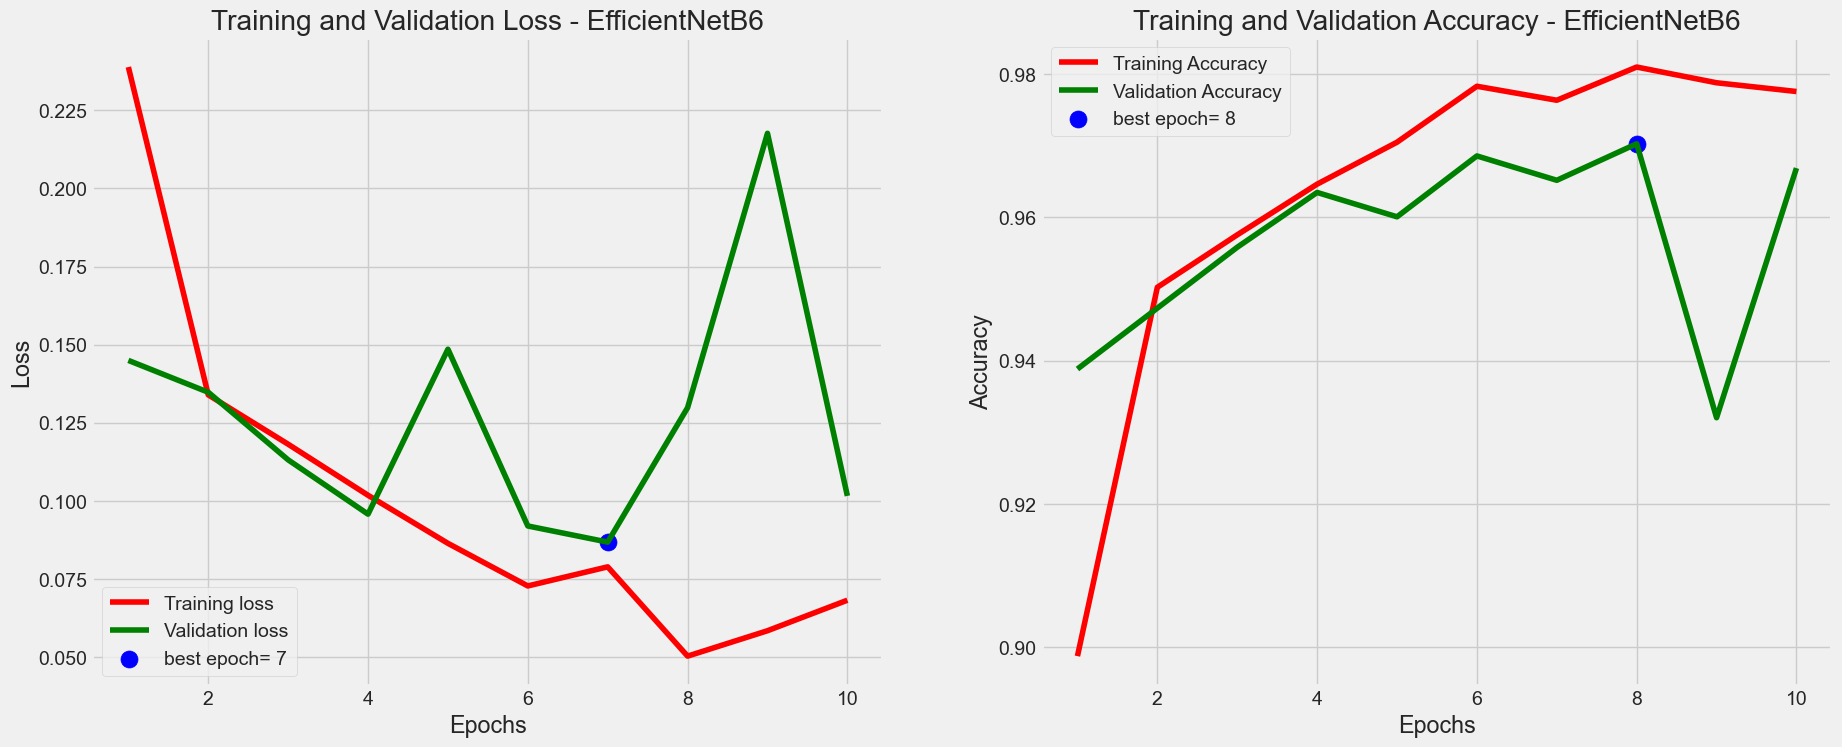

37/37 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - Accuracy: 0.9665 - loss: 0.1019
Base Model: EfficientNetB6


Validation Loss: 0.10151778906583786
Validation Accuracy: 0.9668648838996887


19/19 ━━━━━━━━━━━━━━━━━━━━ 56s 3s/step
[[152   8]
 [  3 417]]


Precision: 0.9811764705882353
Recall: 0.9928571428571429
F1_Score: <function f1_score at 0x0000021ABAF13240>


              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97       160
         1.0       0.98      0.99      0.99       420

    accuracy                           0.98       580
   macro avg       0.98      0.97      0.98       580
weighted avg       0.98      0.98      0.98       580







C:\Users\Parth\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Base Model: EfficientNetB7


Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 630s 5s/step - Accuracy: 0.8364 - loss: 0.3576 - val_Accuracy: 0.9159 - val_loss: 0.2215
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 588s 5s/step - Accuracy: 0.9437 - loss: 0.1582 - val_Accuracy: 0.9626 - val_loss: 0.1030
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 588s 5s/step - Accuracy: 0.9625 - loss: 0.0972 - val_Accuracy: 0.9643 - val_loss: 0.0988
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 588s 5s/step - Accuracy: 0.9726 - loss: 0.0806 - val_Accuracy: 0.9720 - val_loss: 0.1154
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 587s 5s/step - Accuracy: 0.9738 - loss: 0.0704 - val_Accuracy: 0.9473 - val_loss: 0.1314
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 586s 5s/step - Accuracy: 0.9697 - loss: 0.0931 - val_Accuracy: 0.9754 - val_loss: 0.0964
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 581s 5s/step - Accuracy: 0.9784 - loss: 0.0556 - val_Accuracy: 0.9720 - val_loss: 0.0832
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 580s 5s/step - Accuracy: 0.9

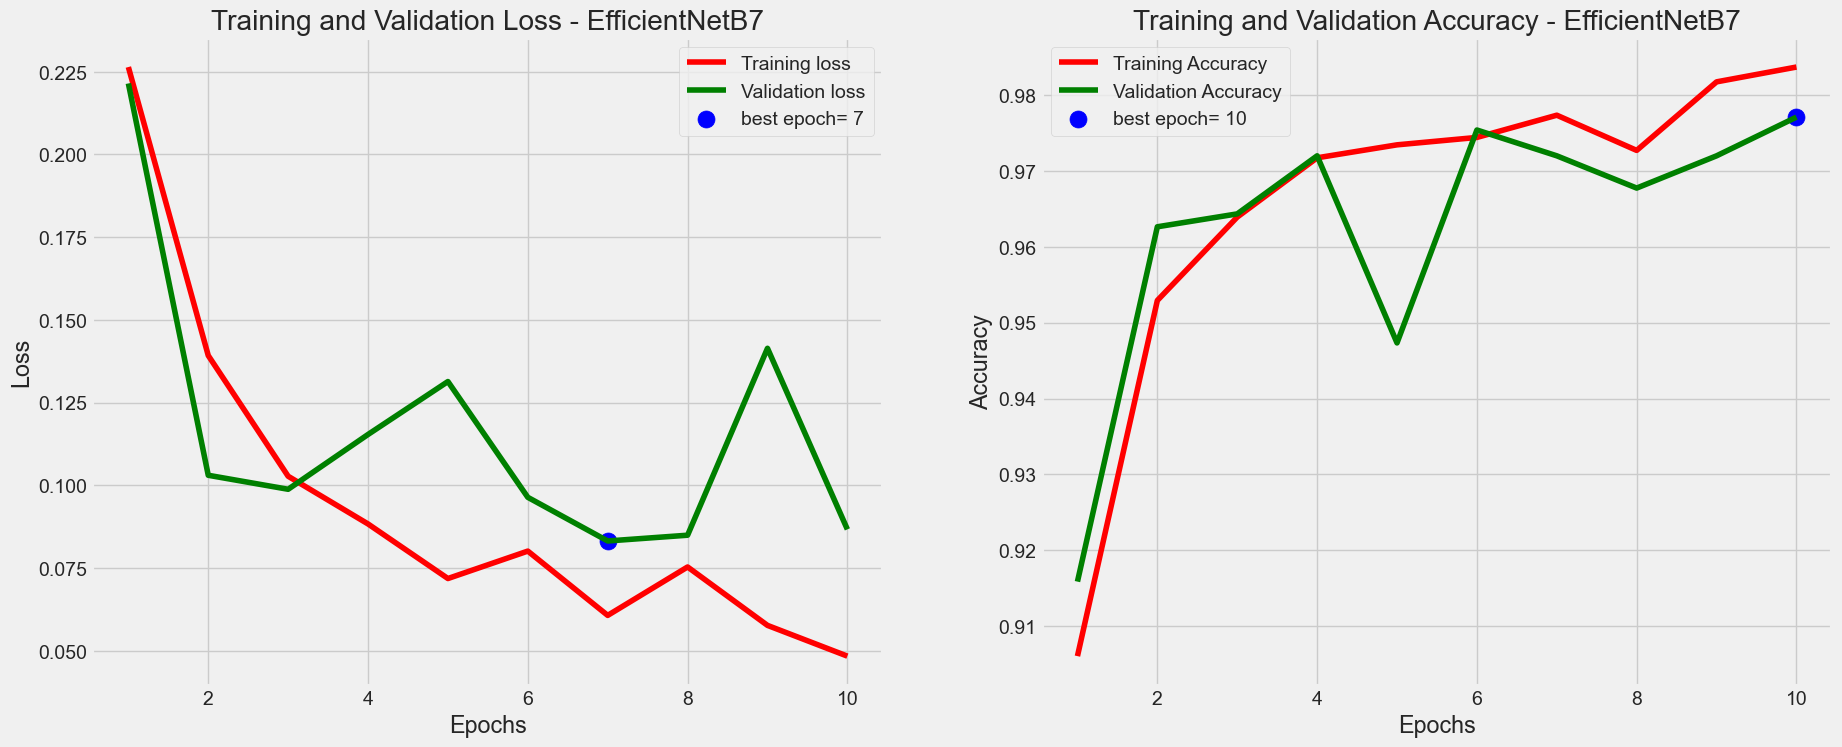

37/37 ━━━━━━━━━━━━━━━━━━━━ 124s 3s/step - Accuracy: 0.9774 - loss: 0.0916
Base Model: EfficientNetB7


Validation Loss: 0.0866774469614029
Validation Accuracy: 0.9770603179931641


19/19 ━━━━━━━━━━━━━━━━━━━━ 73s 4s/step
[[147   8]
 [  8 417]]


Precision: 0.9811764705882353
Recall: 0.9811764705882353
F1_Score: <function f1_score at 0x0000021ABAF13240>


              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       155
         1.0       0.98      0.98      0.98       425

    accuracy                           0.97       580
   macro avg       0.96      0.96      0.96       580
weighted avg       0.97      0.97      0.97       580







In [59]:
for i in range(len(bases)):
    train(bases[i], i)

In [27]:
from tensorflow.keras.models import load_model

In [32]:
for i in range(len(bases)):
    model = load_model(f'EfficientNet_B{i + 1}_base_model.keras')
    validate(model, X_val, y_val, i)
    preds = model.predict(X_test)
    print("\n")
    metrics(y_test, preds)



37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 658ms/step - Accuracy: 0.9756 - loss: 0.0894
Base Model: EfficientNetB1


Validation Loss: 0.087965227663517
Validation Accuracy: 0.9753611087799072


19/19 ━━━━━━━━━━━━━━━━━━━━ 16s 750ms/step


[[153   2]
 [  9 416]]


Precision: 0.9952153110047847
Recall: 0.9788235294117648
F1_Score: 0.9869513641755635


              precision    recall  f1-score   support

           0       0.94      0.99      0.97       155
           1       1.00      0.98      0.99       425

    accuracy                           0.98       580
   macro avg       0.97      0.98      0.98       580
weighted avg       0.98      0.98      0.98       580





37/37 ━━━━━━━━━━━━━━━━━━━━ 30s 701ms/step - Accuracy: 0.9752 - loss: 0.0821
Base Model: EfficientNetB2


Validation Loss: 0.07998654246330261
Validation Accuracy: 0.9770603179931641


19/19 ━━━━━━━━━━━━━━━━━━━━ 17s 802ms/step


[[149   6]
 [  4 421]]


Precision: 0.9859484777517564
Recall: 0.9905882352941177
F1_Score: 0.98826291

In [79]:
print(y_test)

[0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1
 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1
 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1
 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1
 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0
 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 0 1 

In [81]:
y_test.shape

(580,)

In [36]:
model = load_model('EfficientNet_B0_base_model.keras')
validate(model, X_val, y_val, -1)
preds = model.predict(X_test)
print("\n")
metrics(y_test, preds)


37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 481ms/step - Accuracy: 0.9814 - loss: 0.0711
Base Model: EfficientNetB0


Validation Loss: 0.06872528046369553
Validation Accuracy: 0.9770603179931641


19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 545ms/step


[[148   7]
 [  6 419]]


Precision: 0.9835680751173709
Recall: 0.9858823529411764
F1_Score: 0.9847238542890717


              precision    recall  f1-score   support

           0       0.96      0.95      0.96       155
           1       0.98      0.99      0.98       425

    accuracy                           0.98       580
   macro avg       0.97      0.97      0.97       580
weighted avg       0.98      0.98      0.98       580





